<img src="common/fun_long_logo-01.png">

**ThermoFun** is a universal open-source client that delivers thermodynamic properties of substances and reactions at the temperature and pressure of interest.

# How to do batch calculations?
The Batch class is useful for doing multiple (batch) calculations for a given list of substances, reactions, properties, and temperature and pressure grid. Options to set the input and output properties units are available.

### Import ThermoFun python package 

In [1]:
import thermofun.PyThermoFun as fun

### Import a thermodynamic database from a json file
ThermoFun is initialized with a ThermoDataSet. A ThermoDataSet is a collection of records of substances and/or reactions also known in the (geo)chemical community as a thermodynamic database, e.g. SUPCRT98, PSI-Nagra, CEMDATA18. In this example we use a provided database file ```aq17-thermofun.json``` containing several substances (aqueous species, gases, and minerals).

In [2]:
database = fun.Database("databases/aq17-gem-lma-thermofun.json")

### Initialize a batch calculations object using the loaded database

In [3]:
batch = fun.ThermoBatch(database)

### Optional: set calculation and output preferences

In [4]:
op = fun.BatchPreferences()
op.isFixed = True # values are written using fixed-point notation
# if True properties of reactions are calculated from the properties of reactants
# if False properties of reactions are calculated from the method in the reaction record
op.reactionPropertiesFromReactants   = False 
# if True properties of substances are calculated from the dependent reactions
# if False properties of substances are calculated from the method in the substance record
op.substancePropertiesFromReaction   = False 
batch.setBatchPreferences(op)

### Optional: set units and significant digits
For a list of properties set desired units. Default units for temperature and pressure are K and Pa. <br>
For a list of properties set desired significant digits after the (.) to be written in the result file.

In [5]:
batch.setPropertiesUnits(["temperature", "pressure"],["degC","bar"])
batch.setPropertiesDigits(["gibbs_energy","entropy", "volume",
                            "enthalpy","logKr", "temperature", "pressure"], [0, 4, 4, 4, 4, 0, 3])

### Do calculations and write output
Given a list of substance symbols, properties and temperature - pressure pair points, call ```thermoPropertiesSubstance``` and write the results to a csv file.

In [6]:
substances = ["Na+", "Mg+2", "Ca+2", "SiO2@"]
properties = ["gibbs_energy", "enthalpy", "entropy"]
temperature_pressure_pairs = [[50,1000],  [150,1000], [200,1000], [250,1000], [300,1000], [350,1000], 
                              [400,1000], [450,1000], [500,1000], [550,1000], [600,1000], [650,1000], 
                              [700,1000], [800,1000], [900,1000], [1000,1000]]

In [7]:
batch.thermoPropertiesSubstance(temperature_pressure_pairs, substances, properties).toCSV("results.csv")

### Import functions for creating csv download link and data plotting

In [8]:
from common.functions import create_csv_download_link, plot_substances_properties_vs_temperature

### Download the results file

In [9]:
create_csv_download_link("results.csv")

### Plot the results

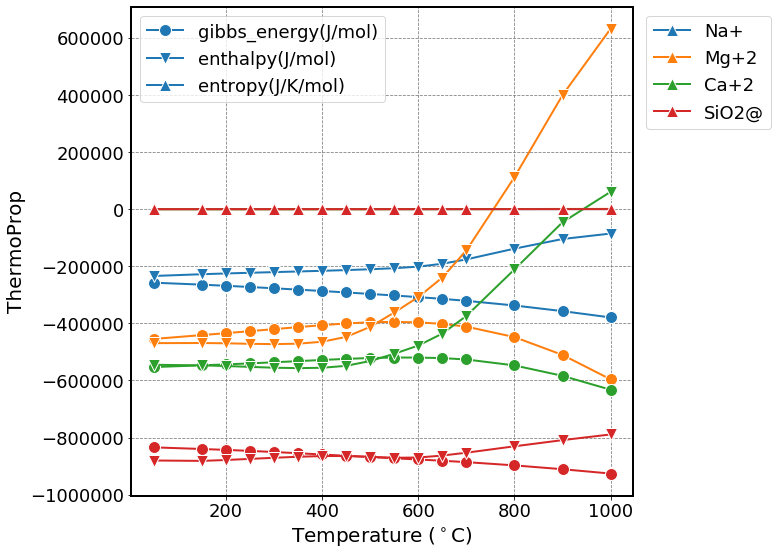

In [10]:
figure = plot_substances_properties_vs_temperature('results.csv', substances, 1000)

In [11]:
#figure.savefig("result_figure.png", format = "png")
#create_download_link( "result_figure.png")

The figure can be retrieved by switching to the previous tab "Home" in the broswer.